In [2]:
%matplotlib inline
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as pld
import numpy as np
import math
from datetime import datetime



games = pd.read_csv("data/games.csv", converters = {'date': lambda x: pd.to_datetime(x)})
#ucl = games.loc[games['comp'] == "(c1)-ligue-des-champions"]

def minify(dates, elos, scale):
    #smooth out arrays so results arent so noisy
    newDates = []; newElos = []
    for i in range(scale-1, len(elos), scale):
        newElos.append(np.mean(elos[i-scale:i+1]))
        newDates.append(dates[i - scale/2])
    return (newDates, newElos)




##So who are the best teams of each decade? 
Lets split up the data by decade and find the top teams for each, then put these all in some plots. 


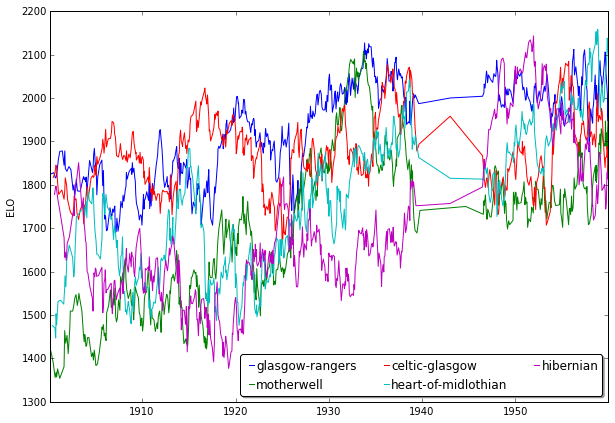

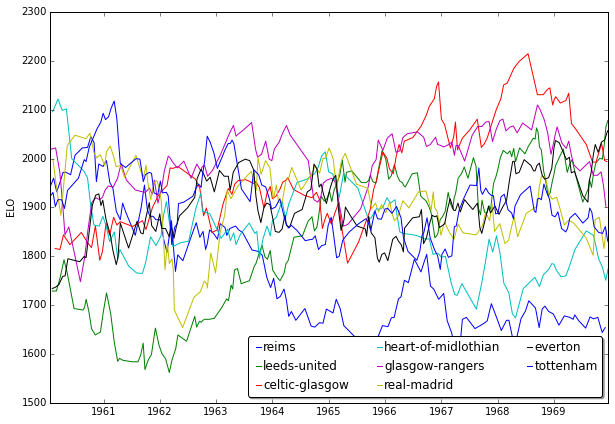

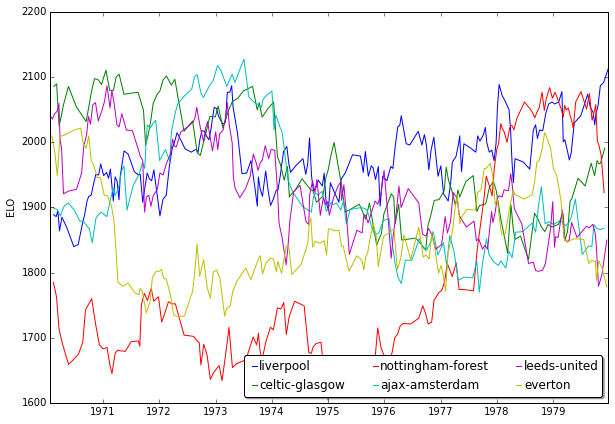

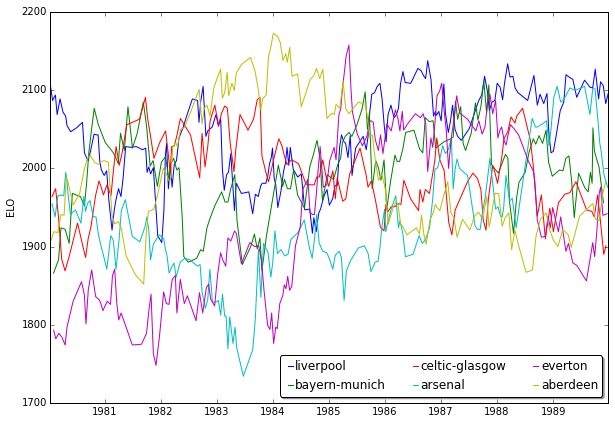

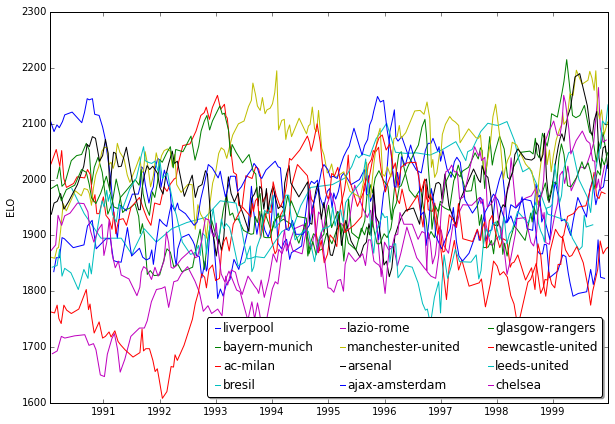

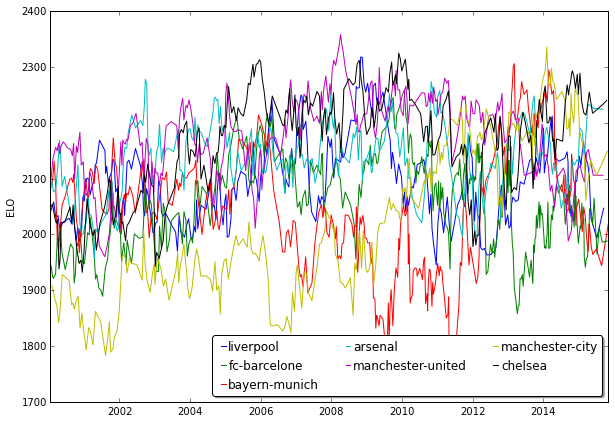

In [7]:

decades = [1900, 1960, 1970, 1980, 1990, 2000, 2016]
plt.rcParams["figure.figsize"] = [10,7]
for i in range(1, len(decades)):
    firstDay = datetime(decades[i-1], 1,1,0,0,0); lastDay = datetime(decades[i], 1,1,0,0,0);
    filGames = games[(games['date'] > firstDay) &(games['date'] < lastDay)]
    
    #topTeams = set(filGames.sort('hElo', ascending = False).head(300)['home'].values)
    elite = set(filGames.sort('hElo', ascending = False).head(140)['home'].values)
    #print(str(decades[i-1])+"-"+str(decades[i]), elite)
    
    teamArrays = {team : filGames[((filGames['home'] == team) | (filGames['away'] == team))] for team in elite}  

    labels = []
    for team in teamArrays:
        
        myGames = teamArrays[team]
        dateFloats = pld.date2num([d for d in myGames['date']])
        myElos = [g['hElo'] if g['home'] == team else g['aElo'] for q,g in myGames.iterrows()]

        myElos, dateFloats = minify(myElos, dateFloats, 3)
        labels.append(team)
        plt.plot_date(dateFloats, myElos, '-', xdate=True, ydate=False)
        plt.ylabel("ELO")    
    
    plt.legend(labels,ncol=3,  loc="lower right",
               handletextpad=0.0, handlelength=1,
               fancybox=True, shadow=True)
    plt.show()
    
    #plt.savefig("vis/"+str(decades[i-1])+"-"+str(decades[i])+"best.png", dpi=900)
    plt.clf()


###Analysis
it appears that Man U has been the best team of recent, while scottish teams dominated the early part of the first century of football.  
Surprising to see barcelona of 2009 and more recently not quite reach the top as many people consider them their team in the Messi era to be the greatest ever, definitely of recent. 
Since they play in La Liga, which as worse teams on average, a few bad losses can really hurt them, while manchester united during their peak in 2009 might 
have gotten a string of wins against top competiton that sent them over the top. 


##Team with the best Climb?
now another interesting question, what team has had the biggest turnaround. I.e. the biggest climb in a short period.  
You can see in the 2000-2015 graph, Bayern went from around 1800 in 2011 to 2300 in 2012-13, the year they won the Champions League and the German title. How does this sharp climb compare with others in history?


##Comparing the top competitions
So how good is each competition? Keep in mind, when calculating ELO we already elevate the k values of certain leagues (see getKForCompetition(..) in cleanAndCalcElo.py.

We'll need to group the data by year (create a year column real quick) and competition, and mean the ELO's



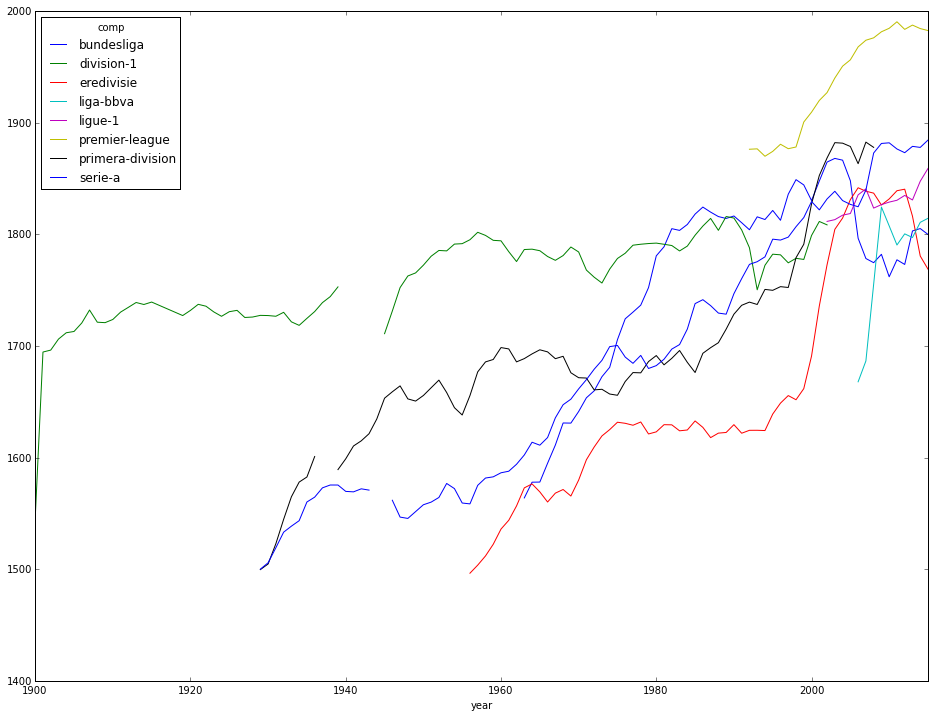

In [8]:

topLeagues = ["premier-league", "serie-a", "ligue-1", "bundesliga", "eredivisie", "division-1", "liga-bbva", "primera-division"]
topCountries = ["england", "france", "italy", "spain", "germany", "italy", "pays-bas", "holland"]

#first lets filter by countys as premier-league  and division-1 are fairly common
tg = games[games['country'].isin(topCountries)]
tg = tg[tg['comp'].isin(topLeagues)]
tg['year'] = tg['date'].apply(lambda x: x.year)

def meanElos(rw):
    rw['elo'] = (rw['aElo'] + rw['hElo'])/2
    return rw

d = tg.groupby( [ 'comp', 'year']).mean()[['hElo', 'aElo']].apply(meanElos, axis=1).drop(['hElo', 'aElo'], axis=1).reset_index('comp')
d = d.pivot( d.index, columns='comp')
d.columns = d.columns.droplevel()

plt.rcParams["figure.figsize"] = [16, 12]

plot = d.plot()
plt.show()


###Analysis

looks like the premier league is a notch above the rest. Division 1 was the name for the Premier league before it started. The Eredivise has only gorren to the level of the other leagues in this century, even though Ajax was one of the worlds top teams in the 1970s, interesting.

##Best team in these top leagues?


how about team with the best mean for all the top leagues in the past few years
